<a href="https://colab.research.google.com/github/tc3oliver/StratLabFreq/blob/dev/MACD_Divergence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/StratLabFreq')
os.listdir()

['MACD_Divergence_Analysis.ipynb', 'data', 'TaipeiSansTCBeta-Regular.ttf']

In [3]:
import pandas as pd

In [4]:
dataframe = pd.read_json('./data/BTC_USDT-5m.json')
dataframe.columns=['date', 'open' , 'high', 'low', 'close', 'volume' ]
dataframe['date']=(pd.to_datetime(dataframe['date'],unit='ms'))
dataframe

,date,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061
1,2017-08-17 04:05:00,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:10:00,4261.48,4261.48,4261.48,4261.48,0.000000
3,2017-08-17 04:15:00,4261.48,4264.88,4261.48,4261.48,0.484666
4,2017-08-17 04:20:00,4264.88,4266.29,4264.88,4266.29,2.328570
...,...,...,...,...,...,...
617219,2023-07-06 05:50:00,30549.80,30569.99,30549.80,30563.11,105.865190
617220,2023-07-06 05:55:00,30563.11,30593.64,30563.11,30582.51,71.446400
617221,2023-07-06 06:00:00,30582.50,30599.30,30573.33,30575.48,88.509370
617222,2023-07-06 06:05:00,30575.48,30575.48,30560.00,30570.04,58.483620


In [5]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 1.8 MB/s eta 0:00:00


In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.font_manager as fm
import matplotlib as mpl

# 下載字體
# !wget https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download -O TaipeiSansTCBeta-Regular.ttf

# 註冊字體
# font_path = 'TaipeiSansTCBeta-Regular.ttf'
# prop = fm.FontProperties(fname=font_path)
# 設定 matplotlib 字體
# mpl.rcParams['font.family'] = prop.get_name()
# font={'font.family': prop.get_name()}
# style=mpf.make_mpf_style(base_mpf_style='default', rc=font)

In [7]:
import random

count = 40

def get_random_count_values_dataframe(df):
    if len(df) < count:
        raise ValueError("DataFrame 中的資料數量不足 40 個")

    start_index = random.randint(0, len(df) - count)

    selected_values = df.iloc[start_index : start_index + count]

    selected_df = pd.DataFrame(selected_values)

    return selected_df

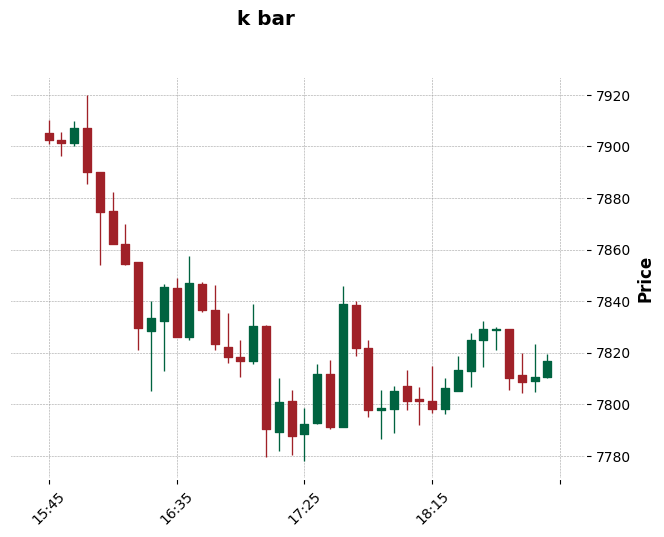

In [8]:
df = get_random_count_values_dataframe(dataframe)

# 將索引設定為 DatetimeIndex
df.set_index('date', inplace=True)

# 繪製 K 線圖
mpf.plot(df, type='candle', style='charles', title='k bar')

# 顯示圖表
plt.show()

In [9]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4259    0  4259    0     0   9151      0 --:--:-- --:--:-- --:--:--  9159
100  517k  100  517k    0     0   576k      0 --:--:-- --:--:-- --:--:-- 4837k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4279    0  4279    0     0  12448      0 --:--:-- --:--:-- --:--:-- 12475
100  392k  100  392k    0     0   558k      0 --:--:-- --:--:-- --:--:--  558k


In [10]:
import talib.abstract as ta

In [11]:
macd = ta.MACD(dataframe, fastperiod=13, slowperiod=34)
dataframe['macdhist'] = macd['macdhist']

In [12]:
# new
# import statistics

# # 尋找三個峰值且這些波峰連續升高
# def find_peak_sequence(data):
#     peaks_index = []
#     wave = []

#     for i in range(len(data)):
#         if i == len(data) - 1:
#             break
#         d = abs(data[i])
#         if len(wave) == 0 or d > wave[-1]:
#             wave.append(d)
#         else:
#             if len(wave) > 1:
#                 peaks_index.append(i-1)
#             wave = [d]

#     if len(wave) > 0:
#         peaks_index.append(i)

#     highlighted_points = [(index, data[index]) for index in peaks_index]

#     temp = highlighted_points[-1]

#     # new
#     if abs(statistics.mean(x[1] for x in highlighted_points[-5:-1])) > abs(temp[-1]):
#       return False, []

#     highlighted_points = highlighted_points[:-1]

#     # new
#     highlighted_points = [n for n in highlighted_points if n[1] < 0]

#     highlighted_points = sorted(
#         highlighted_points, key=lambda x: abs(x[1]), reverse=True)[:2]
#     highlighted_points = sorted(
#         highlighted_points, key=lambda x: x[0], reverse=False)
#     highlighted_points.append(temp)

#     if len(highlighted_points) >= 3:
#         if abs(highlighted_points[-3][1]) > abs(highlighted_points[-2][1]) > abs(highlighted_points[-1][1]):
#                 return True, highlighted_points

#     return False, []

# # 多單條件檢查 零軸以下的 MACD 柱狀體應該大於 windows 的一半
# def find_peak_sequence_logn_wrapper(data):
#   if data[-1] > 0:
#     return False, []
#   count = sum(1 for value in data if value < 0)
#   if count < (len(data) / 2):
#       return False, []
#   return find_peak_sequence(data)

In [13]:
# import numpy as np

# # dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: x[-1] < max(x[:-1]), raw=True)
# # dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: x[-1] < x[0], raw=True)
# dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: (x[-1] < x[0]) & (x[-1] < max(x[:-1])), raw=True)


In [14]:
# import numpy as np

# while True:
#   df = get_random_count_values_dataframe(dataframe)
#   data = df['macdhist'].values.tolist()

#   isfind, l = find_peak_sequence_logn_wrapper(data)


#   if isfind:
#     print(data)
#     print(l)
#     if df['is_low_decreasing'].values.tolist()[-1]:
#       df.set_index('date', inplace=True)

#       # 建立一個 MACD histogram 的圖像
#       ap = mpf.make_addplot(df['macdhist'], panel=1, color='g', secondary_y=False)

#       # 繪製 K 線圖，並添加 MACD histogram
#       mpf.plot(df, type='candle', style='charles', title='k bar', addplot=ap)

#       # 顯示圖表
#       plt.show()

#       break

In [15]:
df = get_random_count_values_dataframe(dataframe)
df.head()

,date,open,high,low,close,volume,macdhist
591183,2023-04-06 20:10:00,28049.84,28057.98,28038.66,28057.97,44.06267,7.474828
591184,2023-04-06 20:15:00,28057.98,28066.72,28057.97,28063.11,69.66186,8.094555
591185,2023-04-06 20:20:00,28063.11,28093.62,28063.11,28079.75,88.47338,9.308404
591186,2023-04-06 20:25:00,28079.76,28092.01,28069.24,28089.04,98.16390,10.332673
591187,2023-04-06 20:30:00,28089.03,28121.87,28083.83,28106.43,140.36390,11.726945


In [16]:
import numpy as np


# dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: (x[-1] < x[0]) & (x[-1] < max(x[:-1])), raw=True)


# # Filter the DataFrame where 'is_low_decreasing' is True
# filtered_df = dataframe[dataframe['is_low_decreasing'] == True]

# # Print the filtered DataFrame
# print(filtered_df)

In [17]:
# 尋找三個峰值且這些波峰連續升高
def find_peak_sequence(data):
        peaks_index = []
        wave = []

        for i in range(len(data)):
            if i == len(data) - 1:
                break
            d = abs(data[i])
            if len(wave) == 0 or d > wave[-1]:
                wave.append(d)
            else:
                if len(wave) > 1:
                    peaks_index.append(i-1)
                wave = [d]

        if len(wave) > 0:
            peaks_index.append(i)

        highlighted_points = [(index, data[index]) for index in peaks_index]

        temp = highlighted_points[-1]


        if len(highlighted_points) < 3:
            return False, []

        highlighted_points = highlighted_points[:-1]

        highlighted_points = sorted(
            highlighted_points, key=lambda x: abs(x[1]), reverse=True)[:2]
        highlighted_points = sorted(
            highlighted_points, key=lambda x: x[0], reverse=False)
        highlighted_points.append(temp)

        if len(highlighted_points) >= 3:
            if abs(highlighted_points[-3][1]) > abs(highlighted_points[-2][1]) > abs(highlighted_points[-1][1]):
                    return True, highlighted_points

        return False, []



In [18]:
# dataframe['is_high_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: (x[-1] > x[0]) & (x[-1] > max(x[:-1])), raw=True)
# 判斷高點持續提高
max_open_close = pd.Series.max(dataframe[['open', 'close']], axis=1)
dataframe['is_high_increase'] = max_open_close.rolling(window=count).apply(lambda x: (x[-1] > x[0]) & (x[-1] > max(x[:-1])), raw=True)

# 空單條件檢查 零軸以上的 MACD 柱狀體應該大於 windows 的一半
def find_peak_sequence_short_wrapper(data):
            if data[-1] < 0:
                return False, []
            if abs(statistics.mean(x for x in data[-3:-1])) > abs(data[-1]):
                return False, []
            count = sum(1 for value in data if value > 0)
            if count < (len(data) / 2):
                return False, []
            return find_peak_sequence([n for n in data if n > 0])

[2.4750608306595367, 3.2578802307711783, 4.052141126686525, 3.679408580273721, 2.62736392493661, 1.205125423006388, -0.2978809644249889, -0.8354237209004385, -3.020409012262771, -5.445426531037331, -6.42740626003031, -7.073263844432642, -5.8498337281440485, -4.1633449424630165, -2.159997158550315, -1.5940957478605497, -2.705152634057562, -3.1098850607662207, -2.565679507469273, -2.1824870694800254, -1.9842358537557132, 1.450155122630207, 4.769959059420831, 5.846267428863705, 8.861303974210564, 10.366694068434441, 9.788451646243743, 9.474200633788223, 9.402640724131853, 10.011392542639166, 8.963281302862523, 7.854210074041153, 6.761212466536123, 4.949327309288868, 3.808785898679644, 2.8997354702118394, 2.2683170094841802, 2.2826421404082353, 2.6038046248856346, 3.7533619159924863]
[(10, 10.366694068434441), (14, 10.011392542639166), (24, 3.7533619159924863)]


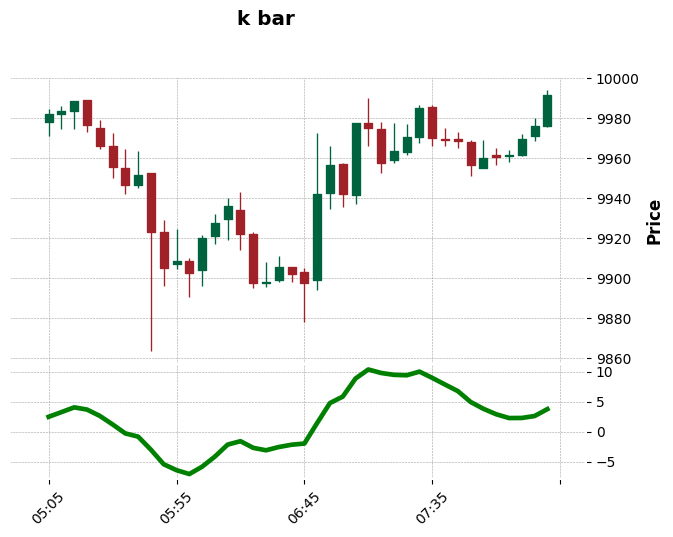

In [19]:
import statistics

while True:

  df = get_random_count_values_dataframe(dataframe)
  data = df['macdhist'].values.tolist()



  isfind, l = find_peak_sequence_short_wrapper(data)


  if isfind:
    if df['is_high_increase'].values.tolist()[-1]:
      print(data)
      print(l)
      df.set_index('date', inplace=True)

      # 建立一個 MACD histogram 的圖像
      ap = mpf.make_addplot(df['macdhist'], panel=1, color='g', secondary_y=False)

      # 繪製 K 線圖，並添加 MACD histogram
      mpf.plot(df, type='candle', style='charles', title='k bar', addplot=ap)

      # 顯示圖表
      plt.show()

      break

In [20]:
# dataframe['is_low_decreasing'] = dataframe['low'].rolling(window=count).apply(lambda x: (x[-1] < x[0]) & (x[-1] < max(x[:-1])), raw=True)

In [21]:
# 判斷低點持續降低
min_open_close = pd.Series.min(dataframe[['open', 'close']], axis=1)
dataframe['is_low_decreasing'] = min_open_close.rolling(window=count).apply(lambda x: (x[-1] < x[0]) & (x[-1] < min(x[:-1])), raw=True)

# 多單條件檢查 零軸以下的 MACD 柱狀體應該大於 windows 的一半
def find_peak_sequence_logn_wrapper(data):
  if data[-1] > 0:
    return False, []
  count = sum(1 for value in data if value < 0)
  if count < (len(data) / 2):
      return False, []
  return find_peak_sequence(data)

[17.44914707033456, 15.48332611557153, 11.894262371106521, 8.655730619911736, 2.1586430513661696, -1.4036475189532496, -5.315870743148864, -8.792749186167512, -10.92010364597455, -17.12286406718202, -21.531537933393324, -17.150385930160695, -14.925446579757846, -11.091920447446526, -16.883716245832204, -24.88274369132928, -28.687334783868906, -29.15992524685481, -26.799848914283075, -21.949888825281413, -19.51960228090131, -18.289354922411384, -20.063545057874244, -20.05749596692653, -20.093363807209204, -21.67094491336899, -20.758508105985214, -17.600759315474058, -15.301416707989464, -12.917371004142026, -13.050911356932705, -10.970902007469967, -9.648612940474624, -8.166571331863693, -11.869880852107793, -15.457513889685078, -18.428158666759387, -18.11963896841554, -15.001250732061461, -15.52891389932251]
[(17, -29.15992524685481), (25, -21.67094491336899), (39, -15.52891389932251)]


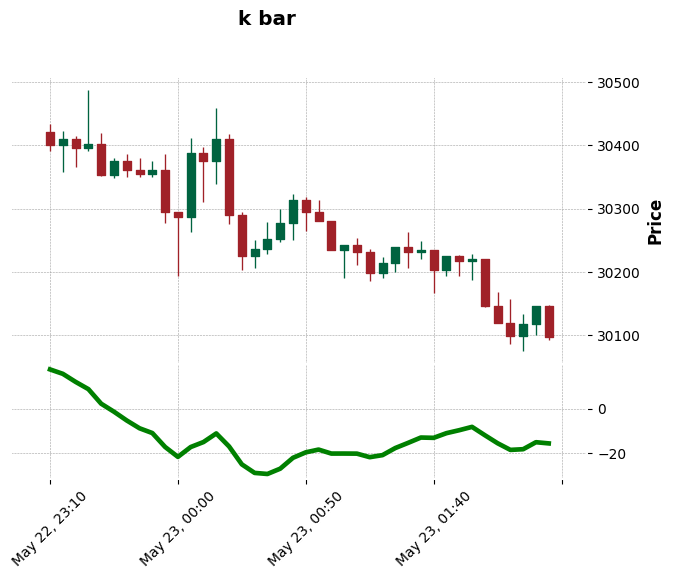

In [22]:
while True:

  df = get_random_count_values_dataframe(dataframe)
  data = df['macdhist'].values.tolist()



  isfind, l = find_peak_sequence_logn_wrapper(data)


  if isfind:

    if df['is_low_decreasing'].values.tolist()[-1]:
      print(data)
      print(l)
      df.set_index('date', inplace=True)

      # 建立一個 MACD histogram 的圖像
      ap = mpf.make_addplot(df['macdhist'], panel=1, color='g', secondary_y=False)

      # 繪製 K 線圖，並添加 MACD histogram
      mpf.plot(df, type='candle', style='charles', title='k bar', addplot=ap)

      # 顯示圖表
      plt.show()

      break